# **2-1. Keras의 3대 API** - MLP

- **Sequential API** : input부터 output까지 일렬로 설계
- **Functional API** : 함수처럼 순서에 상관없이 연결
- **Subclassing API** : 맞춤형 모형 설계시 이용

> 가장 간단한 MNIST 로 MLP, CNN, RNN을 세가지 API로 구현해보자

In [113]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)=mnist.load_data()  # array 형태
print(x_train.shape)
print(x_test.shape)  # 28*28 픽셀의 데이터
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
x_train[1]  # 28*28개의 픽셀

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_test   # y는 label

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### MLP

- MNIST는 3D tensor로 구성되어있지만, MLP 적용을 위해 <U>2D tensor로 reshape</U>한다

In [114]:
# preprocessing
from tensorflow.keras.utils import to_categorical, plot_model
num_features = 784  # 픽셀 수(28*28개)

# 3d tensor의 mlp 적용을 위한 reshape
x_train = x_train.reshape(-1, num_features).astype('float32') # -1이 알아서 맞춰줌(원래 6만이 들어갈것임)
x_test = x_test.reshape(-1, num_features).astype('float32')
print(x_train.shape, x_test.shape)

# Activation func 적용을 위해 0과 1사이로 standardization
x_train = x_train/255
x_test = x_test/255   # 0자리를 빼고 255으로 나눈다!

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_class = y_train.shape[1]

print(y_train.shape, y_test.shape)

(60000, 784) (10000, 784)
(60000, 10) (10000, 10)


###  Sequential API  

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_14 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_15 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
________________________________________________

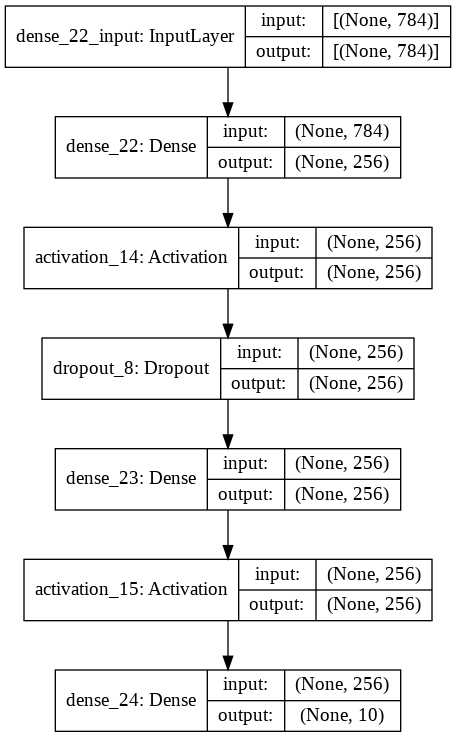

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

model = Sequential()
# 입력층
model.add(Dense(256, input_dim = num_features))  # 모수 : (784+1) * 256 = 200960개 (노드수를 256개로 설정)
model.add(Activation('relu'))
model.add(Dropout(0.45))   # 55%만 전달

# 은닉층
model.add(Dense(256))  # (256+1) * 256 = 65792개
model.add(Activation('relu'))

# 출력층 
model.add(Dense(num_class, activation='softmax'))  # class 개수만큼 출력 (256+1)*10= 2570개softmax')) 
# 여기 activation에 sigmoid가 들어가면 뒤에 loss function이 binary crossentropy가 들어가야함!

model.summary()
plot_model(model, show_shapes=True)

### 여기서 마지막에 출력된 2570개의 모수가 진짜 모수이고, 나머지는 매개변수임. 

In [ ]:
# valid data 생성
x_val=x_train[:10000]  # valid data 만듦
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(50000, 784)
(50000, 10)


In [ ]:
# compile
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy']) 
history=model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=64,validation_data=(x_val,y_val))
history_out=history.history  # history를 history_out에 저장함
history_out.keys() 

Epoch 1/10
782/782 [==============================] - 3s 3ms/step - loss: 0.5598 - accuracy: 0.8303 - val_loss: 0.1356 - val_accuracy: 0.9594
Epoch 2/10
782/782 [==============================] - 2s 3ms/step - loss: 0.1742 - accuracy: 0.9461 - val_loss: 0.1061 - val_accuracy: 0.9685
Epoch 3/10
782/782 [==============================] - 2s 3ms/step - loss: 0.1330 - accuracy: 0.9584 - val_loss: 0.0881 - val_accuracy: 0.9733
Epoch 4/10
782/782 [==============================] - 2s 3ms/step - loss: 0.1143 - accuracy: 0.9630 - val_loss: 0.0869 - val_accuracy: 0.9744
Epoch 5/10
782/782 [==============================] - 2s 3ms/step - loss: 0.0975 - accuracy: 0.9686 - val_loss: 0.0840 - val_accuracy: 0.9758
Epoch 6/10
782/782 [==============================] - 2s 3ms/step - loss: 0.0845 - accuracy: 0.9734 - val_loss: 0.0842 - val_accuracy: 0.9754
Epoch 7/10
782/782 [==============================] - 2s 3ms/step - loss: 0.0836 - accuracy: 0.9730 - val_loss: 0.0713 - val_accuracy: 0.9789
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_out

{'accuracy': [0.8993200063705444,
  0.9480000138282776,
  0.958079993724823,
  0.9631999731063843,
  0.9686200022697449,
  0.9718400239944458,
  0.9731000065803528,
  0.9748600125312805,
  0.9772999882698059,
  0.97816002368927],
 'loss': [0.3338024616241455,
  0.1690685749053955,
  0.13417203724384308,
  0.11466395854949951,
  0.0984668955206871,
  0.08666115999221802,
  0.08355766534805298,
  0.07645799964666367,
  0.06952379643917084,
  0.06526368856430054],
 'val_accuracy': [0.9593999981880188,
  0.968500018119812,
  0.9732999801635742,
  0.974399983882904,
  0.9757999777793884,
  0.9753999710083008,
  0.9789000153541565,
  0.978600025177002,
  0.9794999957084656,
  0.9797000288963318],
 'val_loss': [0.13563711941242218,
  0.10606862604618073,
  0.08811026811599731,
  0.08691809326410294,
  0.08403810113668442,
  0.08423633128404617,
  0.07134938985109329,
  0.07104003429412842,
  0.07412435859441757,
  0.07752126455307007]}

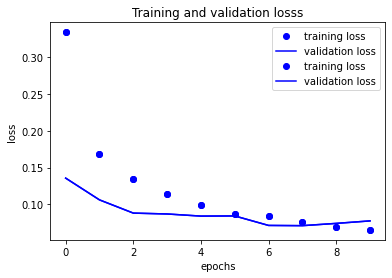

In [ ]:
# history out에 모두 기록됨. 이걸로 plotting 가능!

import matplotlib.pyplot as plt  
loss=history_out['loss']
loss_val=history_out['val_loss']
accuracy=history_out['accuracy']
accuracy_val=history_out['val_accuracy']
plt.plot(loss,'bo',label='training loss')
plt.plot( loss_val,'b', label='validation loss' )
plt.title('Training and validation losss')
plt.xlabel('epochs')

loss=history_out['loss']
loss_val=history_out['val_loss']
accuracy=history_out['accuracy']
accuracy_val=history_out['val_accuracy']
plt.plot(loss,'bo',label='training loss')
plt.plot( loss_val,'b', label='validation loss' )
plt.title('Training and validation losss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

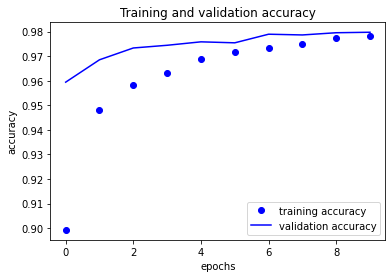

In [ ]:
plt.clf()
plt.plot(accuracy,'bo',label='training accuracy')
plt.plot(accuracy_val,'b', label='validation accuracy' )
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# valid로 계산했으면, 이제 전체 train data에 fitting 하기!
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=30,batch_size=64)  # partial 말고 본격적으로 트레이닝

Epoch 1/30
938/938 [==============================] - 3s 2ms/step - loss: 0.0677 - accuracy: 0.9786
Epoch 2/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0610 - accuracy: 0.9799
Epoch 3/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0637 - accuracy: 0.9799
Epoch 4/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0584 - accuracy: 0.9810
Epoch 5/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0557 - accuracy: 0.9823
Epoch 6/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0519 - accuracy: 0.9829
Epoch 7/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0502 - accuracy: 0.9837
Epoch 8/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0488 - accuracy: 0.9831
Epoch 9/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0450 - accuracy: 0.9848
Epoch 10/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0408 - accuracy: 0.9863

In [ ]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# evaluate
result_train=model.evaluate(x_train,y_train)
result_test=model.evaluate(x_test, y_test)

pred=model.predict(x_test)  

313/313 [==============================] - 1s 2ms/step - loss: 0.0684 - accuracy: 0.9838


### Functional API
순서에 상관없이 함수처럼 자유롭게 사용

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input

# 함수처럼 삽입되어있음!
x = Input(shape=(num_features,))   # input layer을 반드시 정의하기
h1 = Dense(256, activation='relu')(x)
h1 = Dropout(0.45)(h1) 

h2 = Dense(256, activation='relu')(h1)
out = Dense(num_class, activation='softmax')(h2)
model = Model(inputs=x, outputs=out)  # 마지막에 model로 input과 output layer를 정의하기!

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['acc'])
model.fit(x_train,y_train,epochs=30,batch_size=64)

Epoch 1/30
938/938 [==============================] - 2s 2ms/step - loss: 0.5193 - acc: 0.8398
Epoch 2/30
938/938 [==============================] - 2s 2ms/step - loss: 0.1648 - acc: 0.9495
Epoch 3/30
938/938 [==============================] - 2s 2ms/step - loss: 0.1234 - acc: 0.9611
Epoch 4/30
938/938 [==============================] - 2s 2ms/step - loss: 0.1124 - acc: 0.9650
Epoch 5/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0918 - acc: 0.9715
Epoch 6/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0860 - acc: 0.9734
Epoch 7/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0754 - acc: 0.9744
Epoch 8/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0740 - acc: 0.9758
Epoch 9/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0669 - acc: 0.9780
Epoch 10/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0614 - acc: 0.9789
Epoch 11/30
938/938 [============================

### Subclassing API
맞춤형 딥러닝 모델 설계

In [115]:
from tensorflow.keras.layers import Dense, Activation, Layer
import tensorflow as tf

# class를 통해 직접 layer 함수 구현
class MyLayer(Layer):
  def __init__(self, out_dim):   # Output layer를 정의하는 함수임!
    self.out = out_dim
    super(MyLayer, self).__init__()
  
  def build(self, input_shape):
    self.kernel = self.add_weight(shape=(input_shape[1], self.out), trainable=True)
  
  def call(self, inputs):
    return tf.matmul(inputs, self.kernel)

위의 layer class로 output layer를 맞춤형으로 정의한다! keras의 내장 class처럼 정의하면 된다!

In [124]:
# 그냥 단순 모델
model = tf.keras.Sequential([Dense(256, input_shape=(784,)), MyLayer(num_class), Activation('relu')])
model.summary()

# 맞춤형 layer 모델
model1 = tf.keras.Sequential()
model1.add(Dense(256, input_shape=(784,)))
model1.add(MyLayer(num_class))   # 여기에 끼어있는 layer가 내가 제작한 layer
model1.add(Activation('relu'))
model1.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 256)               200960    
_________________________________________________________________
my_layer_10 (MyLayer)        (None, 10)                2560      
_________________________________________________________________
activation_26 (Activation)   (None, 10)                0         
Total params: 203,520
Trainable params: 203,520
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 256)               200960    
_________________________________________________________________
my_layer_11 (MyLayer)        (None, 10)                2560      
________________________

똑같이 학습 진행이 가능하다!

In [125]:
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['acc'])
model1.fit(x_train,y_train,epochs=30,batch_size=64)

Epoch 1/30
938/938 [==============================] - 2s 2ms/step - loss: nan - acc: 0.6590
Epoch 2/30
938/938 [==============================] - 2s 2ms/step - loss: nan - acc: 0.7574
Epoch 3/30
938/938 [==============================] - 2s 2ms/step - loss: nan - acc: 0.6683
Epoch 4/30
938/938 [==============================] - 2s 2ms/step - loss: nan - acc: 0.8093
Epoch 5/30
938/938 [==============================] - 2s 2ms/step - loss: nan - acc: 0.8516
Epoch 6/30
938/938 [==============================] - 2s 2ms/step - loss: nan - acc: 0.8742
Epoch 7/30
938/938 [==============================] - 2s 2ms/step - loss: nan - acc: 0.8532
Epoch 8/30
938/938 [==============================] - 2s 2ms/step - loss: nan - acc: 0.8322
Epoch 9/30
938/938 [==============================] - 2s 2ms/step - loss: nan - acc: 0.8481
Epoch 10/30
938/938 [==============================] - 2s 2ms/step - loss: nan - acc: 0.8591
Epoch 11/30
938/938 [==============================] - 2s 2ms/step - loss: nan 